# Project - Feature Selection
 In This notebook we will explain the main steps that brought us to our finalmodel 

In [12]:
import dataset.dataset as d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn import datasets
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

%matplotlib inline



df = d.read_imputed_onehot_dataset()
#df['Date'] = df['Date'].astype("datetime64[s]")
#df['day_of_week'] = df['Date'].dt.weekday_name
#df_sales_per_day = df.groupby(df["day_of_week"])['NumberOfSales'].agg('sum')

df = df.loc[:, df.columns != 'Date']

df.head()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Events_Fog,Events_Thunderstorm,Events_Hail,StoreType_Hyper Market,StoreType_Super Market,StoreType_Standard Market,StoreType_Shopping Center,AssortmentType_General,AssortmentType_With Non-Food Department,AssortmentType_With Fish Department
0,1000,0,1,0,326,7,495,5676,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000,0,1,0,326,7,608,8111,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000,0,1,0,326,7,665,8300,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000,0,1,0,326,7,630,7154,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000,0,0,0,326,7,0,0,9643,17130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In this section we split the variables in order to perform feature selection 

In [13]:
dataset_to_PCA = df.loc[:, df.columns != 'NumberOfSales']
dataset_to_PCA = dataset_to_PCA.loc[:, dataset_to_PCA.columns != 'NumberOfCustomers']
dataset_to_PCA = dataset_to_PCA.loc[:, dataset_to_PCA.columns != 'IsOpen']
dataset_to_PCA = dataset_to_PCA.loc[:, dataset_to_PCA.columns != 'StoreID']


X = np.array(dataset_to_PCA)
feature_names = np.array(dataset_to_PCA.columns)

target = df['NumberOfCustomers']
y = np.array(target)



Calcoliamo come baseline una linear regression p

In [14]:
'''
kfolds = KFold(3,shuffle=True,random_state=1234)
model = linear_model.LinearRegression()

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

scores = cross_val_score(model, X_, y, cv=kfolds)
scores.mean()
'''

'\nkfolds = KFold(3,shuffle=True,random_state=1234)\nmodel = linear_model.LinearRegression()\n\npoly = PolynomialFeatures(degree=2)\nX_ = poly.fit_transform(X)\n\nscores = cross_val_score(model, X_, y, cv=kfolds)\nscores.mean()\n'

In [15]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(X)

print("Reduced data set shape is ", X_selected_features_variance.shape)

mask = feature_selection_variance_model.get_support() #list of booleans
print("Selected features = ", feature_names[mask])
#tutto molto bello ma riduce solo da 44 features a 34 non ci piace


Reduced data set shape is  (523021, 33)
Selected features =  ['HasPromotions' 'NearestCompetitor' 'Region' 'Region_AreaKM2'
 'Region_GDP' 'Region_PopulationK' 'CloudCover' 'Max_Dew_PointC'
 'Max_Humidity' 'Max_Sea_Level_PressurehPa' 'Max_TemperatureC'
 'Max_VisibilityKm' 'Max_Wind_SpeedKm_h' 'Mean_Dew_PointC' 'Mean_Humidity'
 'Mean_Sea_Level_PressurehPa' 'Mean_TemperatureC' 'Mean_VisibilityKm'
 'Mean_Wind_SpeedKm_h' 'Min_Dew_PointC' 'Min_Humidity'
 'Min_Sea_Level_PressurehPa' 'Min_TemperatureC' 'Min_VisibilitykM'
 'Precipitationmm' 'WindDirDegrees' 'Events_Rain' 'Events_none'
 'Events_Fog' 'StoreType_Hyper Market' 'StoreType_Standard Market'
 'AssortmentType_General' 'AssortmentType_With Non-Food Department']


In [16]:
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

feature_selection_univariate_model = SelectKBest(mutual_info_regression, k=4)
X_selected_features_univariate = feature_selection_univariate_model.fit_transform(X,y)
print("Reduced data set shape is ",X_selected_features_univariate.shape)

mask = feature_selection_univariate_model.get_support() #list of booleans
print("Selected features = ",feature_names[mask])
'''

'\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import mutual_info_regression\n\nfeature_selection_univariate_model = SelectKBest(mutual_info_regression, k=4)\nX_selected_features_univariate = feature_selection_univariate_model.fit_transform(X,y)\nprint("Reduced data set shape is ",X_selected_features_univariate.shape)\n\nmask = feature_selection_univariate_model.get_support() #list of booleans\nprint("Selected features = ",feature_names[mask])\n'

## Principal Component Analysis
We now apply principal component analysis. Since we need to decide how many component to select and for this purpose we apply PCA and plot the explained variance ratio and the cumulative explained variance.

In [17]:
full_pca_model = PCA()
full_fitted_model = full_pca_model.fit(X)

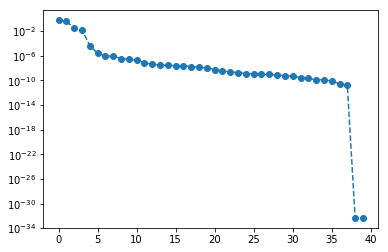

In [18]:
plt.semilogy(full_fitted_model.explained_variance_ratio_, '--o');


Text(0,0.5,'Cumulative Explained Variance Ratio')

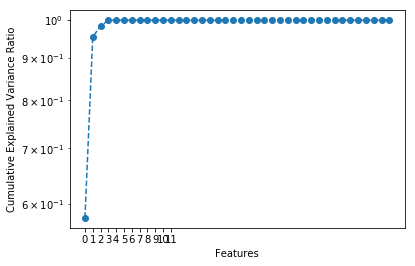

In [19]:
plt.semilogy(full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,12,1));
plt.xlabel("Features")
plt.ylabel("Cumulative Explained Variance Ratio")

Da qui vediamo quante componenti spiegano la varianza del modello, fatto questo passo passiamo a selezionare esclusivamente quel numero di componenti. 

In [20]:
feature_selection_pca_model = PCA(n_components=4)
fitted_model = feature_selection_pca_model.fit(X)

X_selected_features_pca = fitted_model.transform(X)

print("Explained Variance: %s" % fitted_model.explained_variance_ratio_)
print("Reduced data set shape is ", X_selected_features_pca.shape)

print(X_selected_features_pca)

Explained Variance: [0.57680429 0.37766561 0.02953249 0.01594876]
Reduced data set shape is  (523021, 4)
[[-7587.45217091 -3166.56183819  2329.22831424  2019.64374696]
 [-7587.47655093 -3166.55888114  2329.40739499  2019.53660106]
 [-7587.45299057 -3166.57539313  2329.24324184  2019.58993902]
 ...
 [-3328.99364499 -2827.13384891  2601.0618814   1965.5083956 ]
 [-3329.00413811 -2827.14427888  2601.14891714  1965.42234416]
 [-3329.01271265 -2827.14096602  2601.20808634  1965.39805868]]


In [21]:
'''
kfolds = KFold(3,shuffle=True,random_state=1234)
model = linear_model.LinearRegression()

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

scores = cross_val_score(model, X_, y, cv=kfolds)
scores.mean()
'''

'\nkfolds = KFold(3,shuffle=True,random_state=1234)\nmodel = linear_model.LinearRegression()\n\npoly = PolynomialFeatures(degree=2)\nX_ = poly.fit_transform(X)\n\nscores = cross_val_score(model, X_, y, cv=kfolds)\nscores.mean()\n'

## Random Forest
We now apply a random forest and use its scoring to select the attributes


In [22]:
forest = ExtraTreesRegressor(n_estimators=50, random_state=0)
forest.fit(X, y)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 2 NearestCompetitor (0.236290)
2. feature 1 HasPromotions (0.110329)
3. feature 36 StoreType_Shopping Center (0.101501)
4. feature 0 IsHoliday (0.055450)
5. feature 4 Region_AreaKM2 (0.032034)
6. feature 35 StoreType_Standard Market (0.025110)
7. feature 5 Region_GDP (0.024423)
8. feature 6 Region_PopulationK (0.020672)
9. feature 26 WindDirDegrees (0.020397)
10. feature 3 Region (0.020345)
11. feature 19 Mean_Wind_SpeedKm_h (0.020114)
12. feature 13 Max_Wind_SpeedKm_h (0.019800)
13. feature 21 Min_Humidity (0.018801)
14. feature 22 Min_Sea_Level_PressurehPa (0.018562)
15. feature 10 Max_Sea_Level_PressurehPa (0.017545)
16. feature 18 Mean_VisibilityKm (0.017100)
17. feature 15 Mean_Humidity (0.017034)
18. feature 7 CloudCover (0.017032)
19. feature 16 Mean_Sea_Level_PressurehPa (0.016369)
20. feature 9 Max_Humidity (0.016146)
21. feature 24 Min_VisibilitykM (0.015323)
22. feature 11 Max_TemperatureC (0.014276)
23. feature 20 Min_Dew_PointC (0.014057)
24. fe

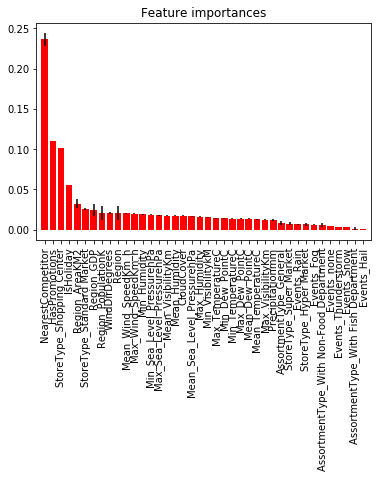

In [25]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [26]:
feature_selection_model = SelectFromModel(forest, prefit=True)
X_selected_features_forest = feature_selection_model.transform(X)
X_selected_features_forest.shape

(523021, 6)